In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras import Sequential, regularizers
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.regularizers import l2

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image
import os
import sys


from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
 

pneumonia_filenames="..Data/train/PNEUMONIA"
normal_filenames = "..Data/train/NORMAL"

In [13]:
parent_dir =  os.path.dirname(os.getcwd())
train_path = os.path.join(parent_dir, 'Data/train')
test_path = os.path.join(parent_dir, 'Data/test')

In [14]:
pneumonia_filenames = os.listdir(os.path.join(train_path, 'pneumonia'))
normal_filenames = os.listdir(os.path.join(train_path, 'normal'))

In [5]:
pneumonia_filenames

['BACTERIA-4038442-0001.jpeg',
 'BACTERIA-8034950-0011.jpeg',
 'BACTERIA-292199-0002.jpeg',
 'BACTERIA-2092977-0003.jpeg',
 'BACTERIA-4407438-0002.jpeg',
 'BACTERIA-8093423-0001.jpeg',
 'BACTERIA-880930-0002.jpeg',
 'VIRUS-3443773-0006.jpeg',
 'BACTERIA-9072988-0002.jpeg',
 'VIRUS-9674936-0007.jpeg',
 'VIRUS-1387612-0002.jpeg',
 'BACTERIA-778527-0001.jpeg',
 'BACTERIA-7564600-0004.jpeg',
 'BACTERIA-1982399-0002.jpeg',
 'BACTERIA-3246536-0004.jpeg',
 'BACTERIA-4991468-0003.jpeg',
 'BACTERIA-8188709-0003.jpeg',
 'BACTERIA-112674-0001.jpeg',
 'BACTERIA-3044214-0001.jpeg',
 'VIRUS-6897628-0002.jpeg',
 'VIRUS-385176-0010.jpeg',
 'BACTERIA-4679582-0001.jpeg',
 'BACTERIA-6162615-0002.jpeg',
 'BACTERIA-1199786-0002.jpeg',
 'BACTERIA-5150733-0007.jpeg',
 'BACTERIA-516591-0002.jpeg',
 'BACTERIA-3582443-0002.jpeg',
 'VIRUS-149498-0002.jpeg',
 'BACTERIA-2792838-0006.jpeg',
 'BACTERIA-6944416-0001.jpeg',
 'BACTERIA-4521338-0003.jpeg',
 'BACTERIA-5401887-0003.jpeg',
 'BACTERIA-1790048-0002.jpeg',
 '

In [1]:


#datagen = ImageDataGenerator(rotation_range=15)
#aug_iter=datagen.flow_from_directory(train_path,target_size=(256, 256),color_mode='grayscale')
#fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12,12))
#for i in range(3):
	# convert to unsigned integers
#	image = next(aug_iter)[0][0]
	# plot image
#	ax[i].imshow(image,cmap='gray')
#	ax[i].axis('off')

In [6]:
import matplotlib.image as mpimg

In [2]:

#import matplotlib.pyplot as plt
#import matplotlib.image as mpimg
#img = mpimg.imread('../Data/train/NORMAL/NORMAL-2154341-0002.jpeg')
#imgplot= plt.imshow(img, cmap='gray')
#plt.show()

In [3]:
#plt.figure(figsize=(15,15))
#for i in range(30):
#    filename = normal_filenames[i]
#    img_addr = train_path + '/NORMAL/' + filename
#    img = Image.open(img_addr)
#    ax = plt.subplot(10,5,i+1)
#    plt.imshow(img, cmap='gray')

In [19]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
 
img_width, img_height = 256, 256

In [20]:
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)


In [21]:

train_data_dir = train_path
validation_data_dir = test_path
nb_train_samples =400
nb_validation_samples = 100
epochs = 25
#50? seems to start overfitting
batch_size = 16

In [22]:



model = Sequential()
model.add(Conv2D(32, (2, 2), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
 
model.add(Conv2D(32, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
 
model.add(Conv2D(64, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
 
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

Metal device set to: Apple M2 Max


2023-05-08 18:08:58.878848: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-05-08 18:08:58.878959: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [23]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [ ]:
train_datagen = ImageDataGenerator(
    rotation_range=10)
 
test_datagen = ImageDataGenerator(rescale=1. / 255)
 
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')
 
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')
 
model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

Found 5232 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Epoch 1/25


/var/folders/67/dbt0zf1x41q5bnr6syjzgy5w0000gn/T/ipykernel_82224/4064417839.py:18: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(
2023-05-08 18:09:01.742770: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


In [ ]:
model.summary()


In [147]:
model.save_weights('model_saved.h5')

In [151]:
img_size = (256,256)
batch_size = 32
brightness = [0.8, 1.2]
vsplit = 0.2
rrange = 10
seed = 2023

train_datagen = ImageDataGenerator(validation_split=vsplit, rotation_range=rrange, fill_mode='nearest',
                                   brightness_range=brightness)

val_datagen = ImageDataGenerator()
print('----')
train_generator = train_datagen.flow_from_directory(train_path, target_size=img_size, batch_size=batch_size,
                                                    class_mode='binary', color_mode='grayscale', subset='training',
                                                    shuffle=True, seed=seed)
print('----')
val_generator = train_datagen.flow_from_directory(train_path, target_size=img_size, batch_size=batch_size,
                                                    class_mode='binary', color_mode='grayscale', subset='validation',
                                                    shuffle=True, seed=seed)

----
Found 4187 images belonging to 2 classes.
----
Found 1045 images belonging to 2 classes.


In [152]:

model = Sequential()
model.add(Conv2D(32, (2, 2), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
 
model.add(Conv2D(32, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
 
model.add(Conv2D(64, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
 
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [153]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [154]:
train_datagen = ImageDataGenerator(
    rotation_range=10)
 
test_datagen = ImageDataGenerator(rescale=1. / 255)
 
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')
 
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')
 
model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

Found 5232 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


/var/folders/67/dbt0zf1x41q5bnr6syjzgy5w0000gn/T/ipykernel_62222/4064417839.py:18: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(


Epoch 1/25


2023-05-08 17:42:26.019379: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


12/12 [==============================] - ETA: 0s - loss: 104.7049 - accuracy: 0.5729

2023-05-08 17:42:30.090316: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


12/12 [==============================] - 5s 342ms/step - loss: 104.7049 - accuracy: 0.5729 - val_loss: 0.6884 - val_accuracy: 0.6146
Epoch 2/25
12/12 [==============================] - 4s 325ms/step - loss: 0.6874 - accuracy: 0.7962 - val_loss: 0.6865 - val_accuracy: 0.6562
Epoch 3/25
12/12 [==============================] - 4s 341ms/step - loss: 0.4183 - accuracy: 0.8359 - val_loss: 0.6791 - val_accuracy: 0.6458
Epoch 4/25
12/12 [==============================] - 4s 341ms/step - loss: 1.4272 - accuracy: 0.8099 - val_loss: 0.6900 - val_accuracy: 0.7708
Epoch 5/25
12/12 [==============================] - 4s 331ms/step - loss: 0.4466 - accuracy: 0.8464 - val_loss: 0.6903 - val_accuracy: 0.8854
Epoch 6/25
12/12 [==============================] - 4s 334ms/step - loss: 0.7652 - accuracy: 0.8125 - val_loss: 0.6865 - val_accuracy: 0.8854
Epoch 7/25
12/12 [==============================] - 4s 341ms/step - loss: 1.3263 - accuracy: 0.7656 - val_loss: 0.6873 - val_accuracy: 0.8125
Epoch 8/25
12/1

In [155]:
model.summary()


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 255, 255, 32)      416       
                                                                 
 activation_40 (Activation)  (None, 255, 255, 32)      0         
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 127, 127, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 126, 126, 32)      4128      
                                                                 
 activation_41 (Activation)  (None, 126, 126, 32)      0         
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 63, 63, 32)       0         
 g2D)                                                 

In [156]:
model.save_weights('kevin_model_saved.h5')

In [10]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
 
img_width, img_height = 500, 500

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)
    
    
train_data_dir = train_path
validation_data_dir = test_path
nb_train_samples =400
nb_validation_samples = 100
epochs = 25
#50? seems to start overfitting
batch_size = 16



#256 melted the computer
model = Sequential()
model.add(Conv2D(32, (2, 2), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
 
model.add(Conv2D(32, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
 
model.add(Conv2D(64, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
 
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [11]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [12]:
train_datagen = ImageDataGenerator(
    rotation_range=10)
 
test_datagen = ImageDataGenerator(rescale=1. / 255)
 
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')
 
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')
 
model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

Found 5232 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Epoch 1/25


/var/folders/67/dbt0zf1x41q5bnr6syjzgy5w0000gn/T/ipykernel_82542/4064417839.py:18: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(
2023-05-08 18:15:08.756251: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


25/25 [==============================] - ETA: 0s - loss: 80.5192 - accuracy: 0.7450

2023-05-08 18:15:16.551234: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


25/25 [==============================] - 9s 320ms/step - loss: 80.5192 - accuracy: 0.7450 - val_loss: 0.6679 - val_accuracy: 0.6354
Epoch 2/25
25/25 [==============================] - 8s 311ms/step - loss: 0.8017 - accuracy: 0.8375 - val_loss: 0.6690 - val_accuracy: 0.6042
Epoch 3/25
25/25 [==============================] - 8s 314ms/step - loss: 2.3572 - accuracy: 0.7675 - val_loss: 0.6491 - val_accuracy: 0.6250
Epoch 4/25
25/25 [==============================] - 8s 318ms/step - loss: 0.8187 - accuracy: 0.7900 - val_loss: 0.7128 - val_accuracy: 0.5104
Epoch 5/25
25/25 [==============================] - 8s 319ms/step - loss: 1.4115 - accuracy: 0.7800 - val_loss: 0.6781 - val_accuracy: 0.6458
Epoch 6/25
25/25 [==============================] - 8s 311ms/step - loss: 0.4506 - accuracy: 0.8500 - val_loss: 0.6707 - val_accuracy: 0.8021
Epoch 7/25
25/25 [==============================] - 8s 312ms/step - loss: 0.9480 - accuracy: 0.8000 - val_loss: 0.6904 - val_accuracy: 0.3958
Epoch 8/25
25/25

In [13]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
 
img_width, img_height = 500, 500

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)
    
    
train_data_dir = train_path
validation_data_dir = test_path
nb_train_samples =400
nb_validation_samples = 100
epochs = 25
#50? seems to start overfitting
batch_size = 16



#256 melted the computer
model = Sequential()
model.add(Conv2D(32, (2, 2), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
 
model.add(Conv2D(32, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
 
model.add(Conv2D(64, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
 
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [14]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

train_datagen = ImageDataGenerator(
    rotation_range=10)
 
test_datagen = ImageDataGenerator(rescale=1. / 255)
 
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')
 
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')
 
model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

Found 5232 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


/var/folders/67/dbt0zf1x41q5bnr6syjzgy5w0000gn/T/ipykernel_82542/2685172367.py:22: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(


Epoch 1/25


2023-05-08 18:21:06.818481: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


25/25 [==============================] - ETA: 0s - loss: 161.2533 - accuracy: 0.6450

2023-05-08 18:21:17.820743: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


25/25 [==============================] - 12s 466ms/step - loss: 161.2533 - accuracy: 0.6450 - val_loss: 0.6857 - val_accuracy: 0.6771
Epoch 2/25
25/25 [==============================] - 12s 466ms/step - loss: 0.7238 - accuracy: 0.8000 - val_loss: 0.6778 - val_accuracy: 0.6146
Epoch 3/25
25/25 [==============================] - 12s 461ms/step - loss: 0.8419 - accuracy: 0.7700 - val_loss: 0.6551 - val_accuracy: 0.6458
Epoch 4/25
25/25 [==============================] - 12s 466ms/step - loss: 10.6415 - accuracy: 0.7475 - val_loss: 0.6560 - val_accuracy: 0.6562
Epoch 5/25
25/25 [==============================] - 12s 466ms/step - loss: 0.8338 - accuracy: 0.6725 - val_loss: 0.6701 - val_accuracy: 0.5938
Epoch 6/25
25/25 [==============================] - 12s 464ms/step - loss: 0.6624 - accuracy: 0.7700 - val_loss: 0.6703 - val_accuracy: 0.6354
Epoch 7/25
25/25 [==============================] - 12s 459ms/step - loss: 0.5754 - accuracy: 0.7775 - val_loss: 0.6783 - val_accuracy: 0.5729
Epoch 8

In [17]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
 
img_width, img_height = 256, 256

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)
    
    
train_data_dir = train_path
validation_data_dir = test_path
nb_train_samples =400
nb_validation_samples = 100
epochs = 25
#50? seems to start overfitting
batch_size = 16



#256 melted the computer
model = Sequential()
model.add(Conv2D(32, (2, 2), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
 
model.add(Conv2D(32, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
 
model.add(Conv2D(64, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
 
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [18]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

train_datagen = ImageDataGenerator(
    rotation_range=10)
 
test_datagen = ImageDataGenerator(rescale=1. / 255)
 
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')
 
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')
 
fitted=model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

Found 5232 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Epoch 1/25


/var/folders/67/dbt0zf1x41q5bnr6syjzgy5w0000gn/T/ipykernel_34108/987714537.py:22: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  fitted=model.fit_generator(
2023-05-10 17:09:04.314502: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


25/25 [==============================] - ETA: 0s - loss: 65.5823 - accuracy: 0.6725

2023-05-10 17:09:08.483054: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


25/25 [==============================] - 5s 166ms/step - loss: 65.5823 - accuracy: 0.6725 - val_loss: 0.6910 - val_accuracy: 0.6354
Epoch 2/25
25/25 [==============================] - 4s 164ms/step - loss: 1.5857 - accuracy: 0.7700 - val_loss: 0.6843 - val_accuracy: 0.6250
Epoch 3/25
25/25 [==============================] - 4s 166ms/step - loss: 3.5196 - accuracy: 0.6600 - val_loss: 0.6869 - val_accuracy: 0.6250
Epoch 4/25
25/25 [==============================] - 4s 171ms/step - loss: 0.5205 - accuracy: 0.7700 - val_loss: 0.6847 - val_accuracy: 0.5938
Epoch 5/25
25/25 [==============================] - 4s 164ms/step - loss: 1.2896 - accuracy: 0.7750 - val_loss: 0.6857 - val_accuracy: 0.5625
Epoch 6/25
25/25 [==============================] - 4s 170ms/step - loss: 0.6464 - accuracy: 0.7875 - val_loss: 0.6837 - val_accuracy: 0.6354
Epoch 7/25
25/25 [==============================] - 4s 166ms/step - loss: 0.5157 - accuracy: 0.8275 - val_loss: 0.6878 - val_accuracy: 0.5625
Epoch 8/25
25/25

In [19]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
 
img_width, img_height = 50, 50

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)
    
    
train_data_dir = train_path
validation_data_dir = test_path
nb_train_samples =400
nb_validation_samples = 100
epochs = 25
#50? seems to start overfitting
batch_size = 16



#256 melted the computer
model = Sequential()
model.add(Conv2D(32, (2, 2), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
 
model.add(Conv2D(32, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
 
model.add(Conv2D(64, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
 
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [20]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

train_datagen = ImageDataGenerator(
    rotation_range=10)
 
test_datagen = ImageDataGenerator(rescale=1. / 255)
 
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')
 
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')
 
fitted=model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

Found 5232 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Epoch 1/25


/var/folders/67/dbt0zf1x41q5bnr6syjzgy5w0000gn/T/ipykernel_34108/987714537.py:22: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  fitted=model.fit_generator(
2023-05-10 17:12:36.921801: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


25/25 [==============================] - ETA: 0s - loss: 8.2380 - accuracy: 0.6400

2023-05-10 17:12:39.470533: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


25/25 [==============================] - 3s 83ms/step - loss: 8.2380 - accuracy: 0.6400 - val_loss: 0.6889 - val_accuracy: 0.6354
Epoch 2/25
25/25 [==============================] - 2s 83ms/step - loss: 1.0551 - accuracy: 0.7000 - val_loss: 0.6895 - val_accuracy: 0.6562
Epoch 3/25
25/25 [==============================] - 2s 75ms/step - loss: 0.6068 - accuracy: 0.7825 - val_loss: 0.6889 - val_accuracy: 0.6458
Epoch 4/25
25/25 [==============================] - 2s 74ms/step - loss: 0.5587 - accuracy: 0.7950 - val_loss: 0.6848 - val_accuracy: 0.6667
Epoch 5/25
25/25 [==============================] - 2s 74ms/step - loss: 0.4842 - accuracy: 0.8025 - val_loss: 0.6826 - val_accuracy: 0.6875
Epoch 6/25
25/25 [==============================] - 2s 84ms/step - loss: 0.4457 - accuracy: 0.8200 - val_loss: 0.6842 - val_accuracy: 0.6146
Epoch 7/25
25/25 [==============================] - 2s 71ms/step - loss: 0.4202 - accuracy: 0.8450 - val_loss: 0.6787 - val_accuracy: 0.6875
Epoch 8/25
25/25 [======

In [21]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
 
img_width, img_height = 25, 25

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)
    
    
train_data_dir = train_path
validation_data_dir = test_path
nb_train_samples =400
nb_validation_samples = 100
epochs = 25
#50? seems to start overfitting
batch_size = 16



#256 melted the computer
model = Sequential()
model.add(Conv2D(32, (2, 2), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
 
model.add(Conv2D(32, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
 
model.add(Conv2D(64, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
 
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [22]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

train_datagen = ImageDataGenerator(
    rotation_range=10)
 
test_datagen = ImageDataGenerator(rescale=1. / 255)
 
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')
 
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')
 
fitted=model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

Found 5232 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Epoch 1/25


/var/folders/67/dbt0zf1x41q5bnr6syjzgy5w0000gn/T/ipykernel_34108/987714537.py:22: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  fitted=model.fit_generator(
2023-05-10 17:14:21.291385: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


25/25 [==============================] - ETA: 0s - loss: 5.0496 - accuracy: 0.6250

2023-05-10 17:14:23.333954: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


25/25 [==============================] - 3s 79ms/step - loss: 5.0496 - accuracy: 0.6250 - val_loss: 0.6909 - val_accuracy: 0.6146
Epoch 2/25
25/25 [==============================] - 2s 76ms/step - loss: 0.9623 - accuracy: 0.7050 - val_loss: 0.6914 - val_accuracy: 0.6250
Epoch 3/25
25/25 [==============================] - 2s 73ms/step - loss: 0.5648 - accuracy: 0.7425 - val_loss: 0.6920 - val_accuracy: 0.5521
Epoch 4/25
25/25 [==============================] - 2s 76ms/step - loss: 0.6720 - accuracy: 0.7100 - val_loss: 0.6915 - val_accuracy: 0.5417
Epoch 5/25
25/25 [==============================] - 2s 77ms/step - loss: 0.5612 - accuracy: 0.7350 - val_loss: 0.6892 - val_accuracy: 0.6146
Epoch 6/25
25/25 [==============================] - 2s 77ms/step - loss: 0.5636 - accuracy: 0.7550 - val_loss: 0.6866 - val_accuracy: 0.6250
Epoch 7/25
25/25 [==============================] - 2s 74ms/step - loss: 0.4372 - accuracy: 0.7925 - val_loss: 0.6858 - val_accuracy: 0.6146
Epoch 8/25
25/25 [======

In [23]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
 
img_width, img_height = 25, 25

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)
    
    
train_data_dir = train_path
validation_data_dir = test_path
nb_train_samples =400
nb_validation_samples = 100
epochs = 45
#50? seems to start overfitting
batch_size = 16



#256 melted the computer
model = Sequential()
model.add(Conv2D(32, (2, 2), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
 
model.add(Conv2D(32, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
 
model.add(Conv2D(64, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
 
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [24]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

train_datagen = ImageDataGenerator(
    rotation_range=10)
 
test_datagen = ImageDataGenerator(rescale=1. / 255)
 
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')
 
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')
 
fitted=model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

Found 5232 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Epoch 1/45


/var/folders/67/dbt0zf1x41q5bnr6syjzgy5w0000gn/T/ipykernel_34108/987714537.py:22: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  fitted=model.fit_generator(
2023-05-10 17:16:27.941233: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


25/25 [==============================] - ETA: 0s - loss: 4.9235 - accuracy: 0.6075

2023-05-10 17:16:29.937000: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


25/25 [==============================] - 3s 84ms/step - loss: 4.9235 - accuracy: 0.6075 - val_loss: 0.6916 - val_accuracy: 0.6667
Epoch 2/45
25/25 [==============================] - 2s 75ms/step - loss: 0.8212 - accuracy: 0.6875 - val_loss: 0.6901 - val_accuracy: 0.6146
Epoch 3/45
25/25 [==============================] - 2s 72ms/step - loss: 0.6437 - accuracy: 0.7125 - val_loss: 0.6910 - val_accuracy: 0.6042
Epoch 4/45
25/25 [==============================] - 2s 74ms/step - loss: 0.6359 - accuracy: 0.7300 - val_loss: 0.6895 - val_accuracy: 0.6562
Epoch 5/45
25/25 [==============================] - 2s 69ms/step - loss: 0.6106 - accuracy: 0.7800 - val_loss: 0.6865 - val_accuracy: 0.6458
Epoch 6/45
25/25 [==============================] - 2s 74ms/step - loss: 0.5125 - accuracy: 0.7600 - val_loss: 0.6906 - val_accuracy: 0.5625
Epoch 7/45
25/25 [==============================] - 2s 68ms/step - loss: 0.5181 - accuracy: 0.7925 - val_loss: 0.6856 - val_accuracy: 0.6354
Epoch 8/45
25/25 [======

In [27]:

img_width, img_height = 2500, 2500

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)
    
    
train_data_dir = train_path
validation_data_dir = test_path
nb_train_samples =400
nb_validation_samples = 100
epochs = 45
#50? seems to start overfitting
batch_size = 16



#256 melted the computer
model = Sequential()
model.add(Conv2D(32, (2, 2), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
 
model.add(Conv2D(32, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
 
model.add(Conv2D(64, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
 
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

train_datagen = ImageDataGenerator(
    rotation_range=10)
 
test_datagen = ImageDataGenerator(rescale=1. / 255)
 
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')
 
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')
 
fitted=model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

Found 5232 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


/var/folders/67/dbt0zf1x41q5bnr6syjzgy5w0000gn/T/ipykernel_34108/987714537.py:22: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  fitted=model.fit_generator(


Epoch 1/45


2023-05-10 18:11:00.589992: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [6]:
import seaborn as sns

def graphingfunc(model):
    train_loss=model.history['loss']
    train_recall = model.history['recall']
    val_loss = model.history['val_loss']
    val_recall = model.history['val_recall']
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    sns.lineplot(x=model.epoch, y=train_loss, ax=ax1, label='train_loss')
    sns.lineplot(x=model.epoch, y=train_recall, ax=ax2, label='train_recall')

    sns.lineplot(x=model.epoch, y=val_loss, ax=ax1, label='val_loss')
    sns.lineplot(x=model.epoch, y=val_recall, ax=ax2, label='val_recall');
    plt.show()
    return 'Done'


In [15]:
graphingfunc(fitted)

KeyError: 'recall'

TypeError: 'History' object is not subscriptable

In [12]:
def plot_history(history):
    train_loss = history.history['loss']
    train_recall = history.history['recall']
    val_loss = history.history['val_loss']
    val_recall = history.history['val_recall']

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    sns.lineplot(x=history.epoch, y=train_loss, ax=ax1, label='train_loss')
    sns.lineplot(x=history.epoch, y=train_recall, ax=ax2, label='train_recall')

    sns.lineplot(x=history.epoch, y=val_loss, ax=ax1, label='val_loss')
    sns.lineplot(x=history.epoch, y=val_recall, ax=ax2, label='val_recall')

    plt.show()

In [16]:
plot_history(fitted)

KeyError: 'recall'

In [ ]:
cm = ConfusionMatrixDisplay(confusion_matrix(train_gen1.classes, model1_preds), display_labels=list(train_gen1.class_indices.keys()))
cm.plot();

# Final Model From Kevin

In [20]:
# This function creates image generators for train and validation to be used in our models
# We can call this function and alter its arguments in order to determine which model works best for our needs
def ImgGen(data_path, img_size=(128,128), batch_size=32, brightness=[0.8, 1.2], vsplit=0.2, rrange=10, seed=2023, shuffle=True):
    train_datagen = ImageDataGenerator(validation_split=vsplit, rotation_range=rrange, fill_mode='nearest',
                                   brightness_range=brightness, rescale=1./255)
    train_gen = train_datagen.flow_from_directory(data_path, target_size=img_size, batch_size=batch_size,
                                                    class_mode='binary', color_mode='grayscale', subset='training',
                                                    shuffle=shuffle, seed=seed)
    val_gen = train_datagen.flow_from_directory(data_path, target_size=img_size, batch_size=batch_size,
                                                    class_mode='binary', color_mode='grayscale', subset='validation',
                                                    shuffle=shuffle, seed=seed)
    return train_gen, val_gen
train_gen1, val_gen1 = ImgGen(train_path)

Found 4187 images belonging to 2 classes.
Found 1045 images belonging to 2 classes.


In [44]:

train_gen2, val_gen2 = ImgGen(train_path, img_size=(128,128), batch_size=32, brightness=None,rrange=0)

Found 4187 images belonging to 2 classes.
Found 1045 images belonging to 2 classes.


In [21]:
model1 = Sequential(name='Model1')

# input_shape must match what's provided to the image generator
model1.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(128,128,1))) 
model1.add(MaxPooling2D(pool_size=(2,2)))

model1.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2,2)))

model1.add(Conv2D(64, (3,3), activation='relu'))
model1.add(Flatten())

model1.add(Dense(64, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))

model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['Recall', 'Precision', 'accuracy'])
model1.summary()

Model: "Model1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 126, 126, 128)     1280      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 63, 63, 128)      0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 61, 61, 128)       147584    
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 30, 30, 128)      0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 64)        73792     
                                                                 
 flatten_1 (Flatten)         (None, 50176)             0    

In [22]:
results1 = model1.fit(train_gen1, epochs=50, workers=10, validation_data=val_gen1, validation_steps=100//train_gen1.batch_size)

Epoch 1/50


2023-05-11 11:06:30.772078: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


131/131 [==============================] - ETA: 0s - loss: 0.4074 - recall: 0.9926 - precision: 0.7975 - accuracy: 0.8075

2023-05-11 11:06:39.204061: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


131/131 [==============================] - 9s 64ms/step - loss: 0.4074 - recall: 0.9926 - precision: 0.7975 - accuracy: 0.8075 - val_loss: 0.2430 - val_recall: 1.0000 - val_precision: 0.9333 - val_accuracy: 0.9479
Epoch 2/50
131/131 [==============================] - 9s 63ms/step - loss: 0.2719 - recall: 0.9800 - precision: 0.9098 - accuracy: 0.9131 - val_loss: 0.2207 - val_recall: 0.9867 - val_precision: 0.8916 - val_accuracy: 0.8958
Epoch 3/50
131/131 [==============================] - 9s 66ms/step - loss: 0.2296 - recall: 0.9675 - precision: 0.9327 - accuracy: 0.9241 - val_loss: 0.1392 - val_recall: 0.9452 - val_precision: 0.9857 - val_accuracy: 0.9479
Epoch 4/50
131/131 [==============================] - 9s 65ms/step - loss: 0.1589 - recall: 0.9565 - precision: 0.9572 - accuracy: 0.9360 - val_loss: 0.1867 - val_recall: 0.9710 - val_precision: 0.9437 - val_accuracy: 0.9375
Epoch 5/50
131/131 [==============================] - 9s 65ms/step - loss: 0.1197 - recall: 0.9672 - precision:

131/131 [==============================] - 7s 50ms/step - loss: 0.0157 - recall: 0.9955 - precision: 0.9958 - accuracy: 0.9936 - val_loss: 0.0803 - val_recall: 1.0000 - val_precision: 0.9867 - val_accuracy: 0.9896
Epoch 38/50
131/131 [==============================] - 7s 50ms/step - loss: 0.0180 - recall: 0.9942 - precision: 0.9955 - accuracy: 0.9924 - val_loss: 0.1027 - val_recall: 0.9615 - val_precision: 0.9740 - val_accuracy: 0.9479
Epoch 39/50
131/131 [==============================] - 7s 50ms/step - loss: 0.0178 - recall: 0.9958 - precision: 0.9945 - accuracy: 0.9928 - val_loss: 0.0255 - val_recall: 0.9863 - val_precision: 1.0000 - val_accuracy: 0.9896
Epoch 40/50
131/131 [==============================] - 7s 49ms/step - loss: 0.0141 - recall: 0.9965 - precision: 0.9961 - accuracy: 0.9945 - val_loss: 0.0980 - val_recall: 0.9733 - val_precision: 1.0000 - val_accuracy: 0.9792
Epoch 41/50
131/131 [==============================] - 7s 49ms/step - loss: 0.0146 - recall: 0.9961 - precis

Epoch 1/50


2023-05-11 13:38:59.455991: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


130/131 [============================>.] - ETA: 0s - loss: 0.3277 - recall: 0.9569 - precision: 0.8707 - accuracy: 0.8626

2023-05-11 13:39:06.216023: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


131/131 [==============================] - 7s 51ms/step - loss: 0.3267 - recall: 0.9569 - precision: 0.8711 - accuracy: 0.8629 - val_loss: 0.1278 - val_recall: 0.9857 - val_precision: 0.9583 - val_accuracy: 0.9583
Epoch 2/50
131/131 [==============================] - 7s 49ms/step - loss: 0.1698 - recall: 0.9572 - precision: 0.9529 - accuracy: 0.9331 - val_loss: 0.0484 - val_recall: 1.0000 - val_precision: 0.9730 - val_accuracy: 0.9792
Epoch 3/50
131/131 [==============================] - 7s 48ms/step - loss: 0.1669 - recall: 0.9598 - precision: 0.9512 - accuracy: 0.9336 - val_loss: 0.0783 - val_recall: 0.9737 - val_precision: 0.9867 - val_accuracy: 0.9688
Epoch 4/50
131/131 [==============================] - 7s 48ms/step - loss: 0.1254 - recall: 0.9685 - precision: 0.9669 - accuracy: 0.9520 - val_loss: 0.1267 - val_recall: 0.9467 - val_precision: 0.9861 - val_accuracy: 0.9479
Epoch 5/50
131/131 [==============================] - 7s 49ms/step - loss: 0.1270 - recall: 0.9697 - precision:

131/131 [==============================] - 7s 49ms/step - loss: 0.0201 - recall: 0.9955 - precision: 0.9961 - accuracy: 0.9938 - val_loss: 0.3167 - val_recall: 0.9494 - val_precision: 0.9868 - val_accuracy: 0.9479
Epoch 38/50
131/131 [==============================] - 7s 50ms/step - loss: 0.0305 - recall: 0.9932 - precision: 0.9936 - accuracy: 0.9902 - val_loss: 0.0335 - val_recall: 0.9870 - val_precision: 1.0000 - val_accuracy: 0.9896
Epoch 39/50
131/131 [==============================] - 7s 51ms/step - loss: 0.0251 - recall: 0.9936 - precision: 0.9929 - accuracy: 0.9900 - val_loss: 0.1453 - val_recall: 0.9701 - val_precision: 0.9848 - val_accuracy: 0.9688
Epoch 40/50
131/131 [==============================] - 7s 50ms/step - loss: 0.0139 - recall: 0.9961 - precision: 0.9977 - accuracy: 0.9955 - val_loss: 0.1418 - val_recall: 1.0000 - val_precision: 0.9744 - val_accuracy: 0.9792
Epoch 41/50
131/131 [==============================] - 7s 50ms/step - loss: 0.0230 - recall: 0.9936 - precis

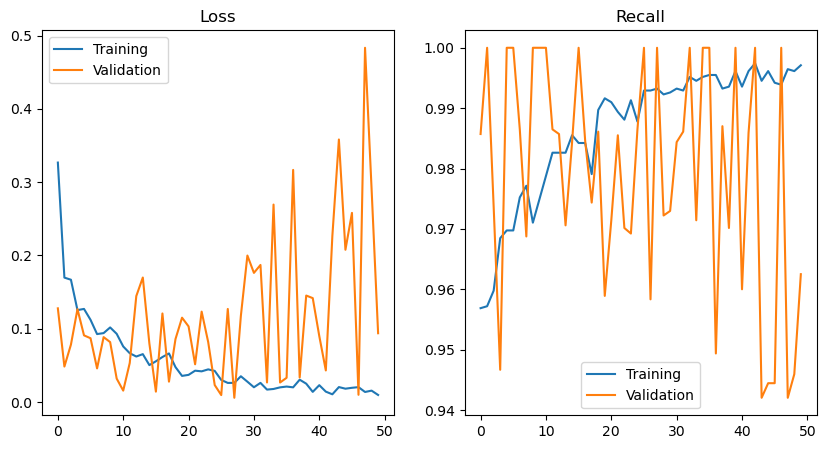

In [62]:
# This function 
def plot_history(history):
    train_loss = history.history['loss']
    train_recall = history.history['recall']
    val_loss = history.history['val_loss']
    val_recall = history.history['val_recall']

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    ax1.set_title('Loss')
    ax2.set_title('Recall')
    ax1.set_ylim([0,1])
    ax2.set_ylim([.6,1])
    sns.lineplot(x=history.epoch, y=train_loss, ax=ax1, label='Training')
    sns.lineplot(x=history.epoch, y=val_loss, ax=ax1, label='Validation')
    sns.lineplot(x=history.epoch, y=train_recall, ax=ax2, label='Training')
    sns.lineplot(x=history.epoch, y=val_recall, ax=ax2, label='Validation')

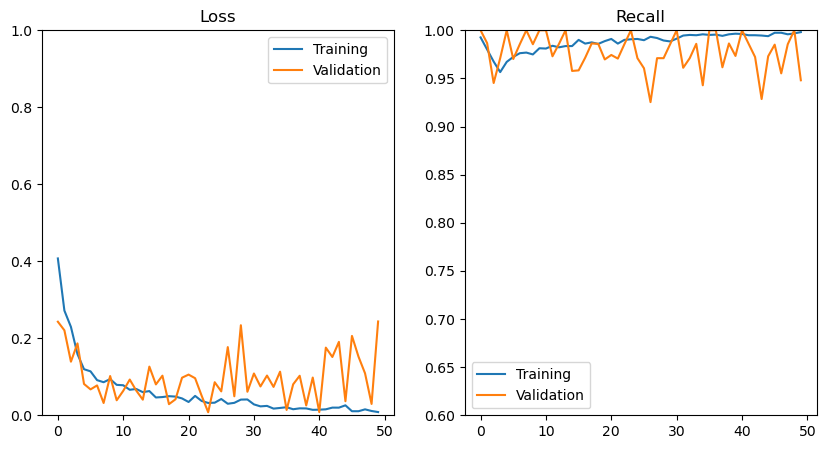

In [63]:
plot_history(results1)

In [57]:
results1.history['val_recall']

[1.0,
 0.9866666793823242,
 0.9452054500579834,
 0.9710144996643066,
 1.0,
 0.9701492190361023,
 0.9855072498321533,
 1.0,
 0.9855072498321533,
 1.0,
 1.0,
 0.9729729890823364,
 0.98591548204422,
 1.0,
 0.9577464461326599,
 0.9583333134651184,
 0.9714285731315613,
 0.9863013625144958,
 0.98591548204422,
 0.9696969985961914,
 0.9743589758872986,
 0.9705882668495178,
 0.9855072498321533,
 1.0,
 0.9710144996643066,
 0.9605263471603394,
 0.9253731369972229,
 0.9710144996643066,
 0.9710144996643066,
 0.9855072498321533,
 1.0,
 0.9610389471054077,
 0.9710144996643066,
 0.98591548204422,
 0.9428571462631226,
 1.0,
 1.0,
 0.9615384936332703,
 0.9863013625144958,
 0.9733333587646484,
 1.0,
 0.9861111044883728,
 0.9722222089767456,
 0.9285714626312256,
 0.9729729890823364,
 0.9850745797157288,
 0.9552238583564758,
 0.9855072498321533,
 1.0,
 0.948051929473877]

In [25]:
# creating generators to use for evaluation
eval_datagen = ImageDataGenerator(rescale=1./255)
eval_gen = eval_datagen.flow_from_directory(train_path, target_size=(128,128), batch_size=32, class_mode='binary',
                                                  color_mode='grayscale', shuffle=False)

Found 5232 images belonging to 2 classes.


In [26]:
model1.evaluate(eval_gen)

164/164 [==============================] - 15s 90ms/step - loss: 0.0381 - recall: 0.9951 - precision: 0.9954 - accuracy: 0.9929


[0.038132112473249435,
 0.9951068758964539,
 0.995363175868988,
 0.992928147315979]

In [32]:
model1_preds = (model1.predict(eval_gen) > 0.5).astype('int32')

2023-05-11 11:25:26.039499: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


164/164 [==============================] - 15s 88ms/step


In [29]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

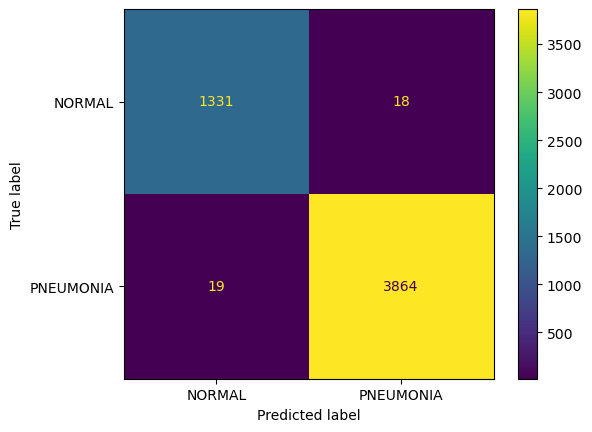

In [33]:
cm = ConfusionMatrixDisplay(confusion_matrix(eval_gen.classes, model1_preds), display_labels=list(eval_gen.class_indices.keys()))
cm.plot();

In [34]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_gen = test_datagen.flow_from_directory(test_path, target_size=(128,128), batch_size=32, class_mode='binary',
                                                  color_mode='grayscale', shuffle=False)

Found 624 images belonging to 2 classes.


20/20 [==============================] - 2s 85ms/step


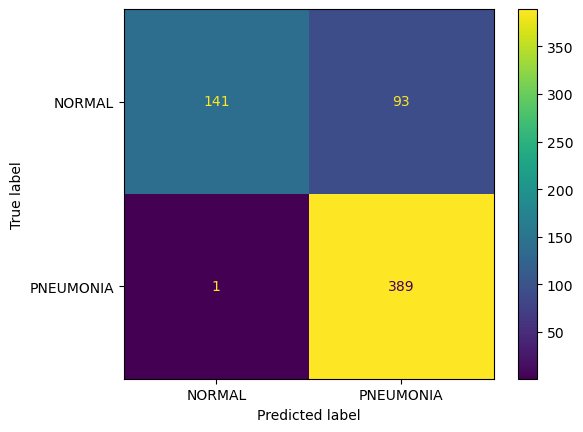

In [35]:
model1__test_preds = (model1.predict(test_gen) > 0.5).astype('int32')
cm = ConfusionMatrixDisplay(confusion_matrix(test_gen.classes, model1__test_preds), display_labels=list(test_gen.class_indices.keys()))
cm.plot();

# Attempting to address Shuffler

In [ ]:
def makemodel(modelname):
    model = Sequential(name=modelname)

    # input_shape must match what's provided to the image generator
    model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(128,128,1))) 
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(64, (3,3), activation='relu'))
    model.add(Flatten())
    
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['Recall', 'Precision', 'accuracy'])
    return model 

FVModel=makemodel('FixedValidation')

In [ ]:
FVMResults=FVModel.fit(train_gen1,epochs=50,workers=15, validation_data=val_gen2,validation_steps=100//train_gen1.batch_size)







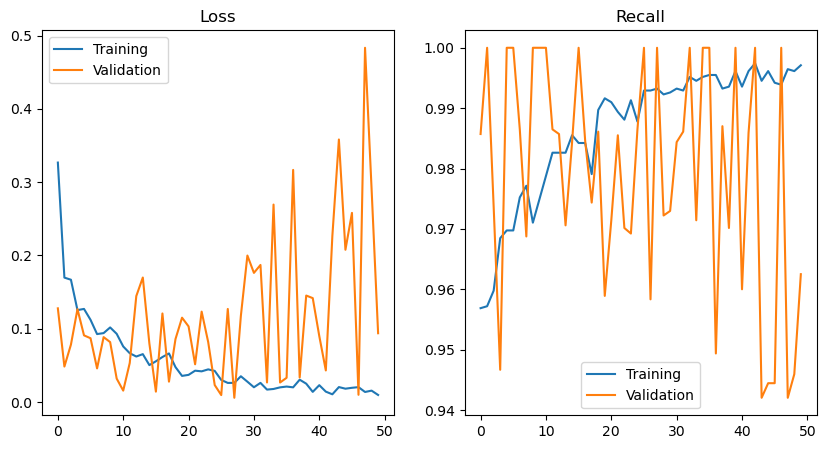

In [55]:
plot_history(FVMResults)

In [59]:
FVMResults.history['val_recall']

[0.985714316368103,
 1.0,
 0.9736841917037964,
 0.9466667175292969,
 1.0,
 1.0,
 0.9864864945411682,
 0.96875,
 1.0,
 1.0,
 1.0,
 0.9864864945411682,
 0.985714316368103,
 0.9705882668495178,
 0.984375,
 1.0,
 0.9846153855323792,
 0.9743589758872986,
 0.9861111044883728,
 0.9589040875434875,
 0.9714285731315613,
 0.9855072498321533,
 0.9701492190361023,
 0.9692307710647583,
 0.9864864945411682,
 1.0,
 0.9583333134651184,
 1.0,
 0.9722222089767456,
 0.9729729890823364,
 0.984375,
 0.9861111044883728,
 1.0,
 0.9714285731315613,
 1.0,
 1.0,
 0.949367105960846,
 0.9870129823684692,
 0.9701492190361023,
 1.0,
 0.9600000381469727,
 0.98591548204422,
 1.0,
 0.9420289993286133,
 0.944444477558136,
 0.944444477558136,
 1.0,
 0.9420289993286133,
 0.9459459781646729,
 0.9625000357627869]

In [ ]:
val_recall=FVMResults.history['val_recall']

In [ ]:
numbers_series = pd.Series(val_recall)
  
# Get the window of series of
# observations till the current time
windows = numbers_series.expanding()
  
# Create a series of moving averages of each window
moving_averages = windows.mean()
  
# Convert pandas series back to list
moving_averages_list = moving_averages.tolist()
  
print(moving_averages_list)

In [ ]:
import numpy as np

In [54]:
window_size = 3
arr=val_recall  
i = 0
# Initialize an empty list to store moving averages
moving_averages = []
  
# Loop through the array t o
#consider every window of size 3
while i < len(arr) - window_size + 1:
  
    # Calculate the average of current window
    window_average = round(np.sum(arr[
      i:i+window_size]) / window_size, 2)
      
    # Store the average of current
    # window in moving average list
    moving_averages.append(window_average)
      
    # Shift window to right by one position
    i += 1
  
print(moving_averages)

[0.99, 0.97, 0.97, 0.98, 1.0, 0.99, 0.99, 0.99, 1.0, 1.0, 0.99, 0.98, 0.98, 0.98, 0.99, 0.99, 0.98, 0.97, 0.97, 0.97, 0.98, 0.97, 0.98, 0.99, 0.98, 0.99, 0.98, 0.98, 0.98, 0.98, 0.99, 0.99, 0.99, 0.99, 0.98, 0.98, 0.97, 0.99, 0.98, 0.98, 0.98, 0.98, 0.96, 0.94, 0.96, 0.96, 0.96, 0.95]
